In [2]:
import pandas as pd

# membaca data 
df = pd.read_csv("Chocolate Sales.csv")

print(df)

          Sales Person    Country              Product       Date    Amount  \
0       Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1          Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2         Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3         Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4       Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    
...                ...        ...                  ...        ...       ...   
1089  Karlen McCaffrey  Australia  Spicy Special Slims  17-May-22   $4,410    
1090    Jehu Rudeforth        USA           White Choc  07-Jun-22   $6,559    
1091      Ches Bonnell     Canada  Organic Choco Syrup  26-Jul-22     $574    
1092    Dotty Strutley      India              Eclairs  28-Jul-22   $2,086    
1093  Karlen McCaffrey      India       70% Dark Bites  23-May-22   $5,075    

      Boxes Shipped  
0               180  
1      

In [5]:
# membersihkan kolom "Amount" (menghilangkan '$' dan koma, konversi ke float)
df['Amount'] = df['Amount'].str.replace('[\$,]', '', regex=True).astype(float)

#statistik Deskriptif
print(df[['Amount', 'Boxes Shipped']].describe())

             Amount  Boxes Shipped
count   1094.000000    1094.000000
mean    5652.308044     161.797989
std     4102.442014     121.544145
min        7.000000       1.000000
25%     2390.500000      70.000000
50%     4868.500000     135.000000
75%     8027.250000     228.750000
max    22050.000000     709.000000


In [6]:
#sales tterbaik
top_salesrespons = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(5)

print(top_salesrespons)

Sales Person
Ches Bonnell       320901.0
Oby Sorrel         316645.0
Madelene Upcott    316099.0
Brien Boise        312816.0
Kelci Walkden      311710.0
Name: Amount, dtype: float64


In [7]:
#produk terlaris
top_product = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(3)

print(top_product)

Product
Smooth Sliky Salty    349692.0
50% Dark Bites        341712.0
White Choc            329147.0
Name: Amount, dtype: float64


In [8]:
#penjualan pernegara
sales_by_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
print(sales_by_country)

Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64


In [10]:
#penjualan bulanan 
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Amount'].sum()
print(monthly_sales)

Month
1    896105.0
2    699377.0
3    749483.0
4    674051.0
5    752892.0
6    865144.0
7    803425.0
8    743148.0
Name: Amount, dtype: float64


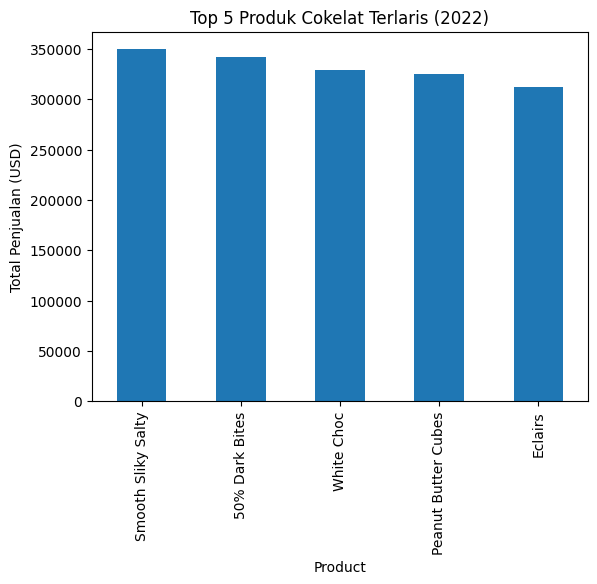

In [14]:
import matplotlib.pyplot as plt

#top 5 produk 
df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(5).plot(
    kind='bar',
    title='Top 5 Produk Cokelat Terlaris (2022)',
    ylabel='Total Penjualan (USD)'
)
plt.show()

In [16]:
# Simpan file yang sudah dibersihkan
cleaned_file_path = "Chocolate Sales Cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

cleaned_file_path


'Chocolate Sales Cleaned.csv'

In [17]:
# Segmentasi perilaku berdasarkan Sales Person
segment_df = df.groupby('Sales Person').agg(
    Frequency=('Date', 'count'),
    Total_Purchase=('Amount', 'sum'),
    Average_Purchase=('Amount', 'mean')
).reset_index()

# Lihat hasil segmentasi awal
segment_df.sort_values(by='Total_Purchase', ascending=False).head()
print(segment_df)

           Sales Person  Frequency  Total_Purchase  Average_Purchase
0        Andria Kimpton         39        201747.0       5173.000000
1          Barr Faughny         43        258713.0       6016.581395
2        Beverie Moffet         50        278922.0       5578.440000
3           Brien Boise         53        312816.0       5902.188679
4        Camilla Castle         32        196616.0       6144.250000
5          Ches Bonnell         48        320901.0       6685.437500
6        Curtice Advani         46        216461.0       4705.673913
7   Dennison Crosswaite         49        291669.0       5952.428571
8        Dotty Strutley         36        190624.0       5295.111111
9          Gigi Bohling         47        232666.0       4950.340426
10      Gunar Cockshoot         43        238483.0       5546.116279
11         Husein Augar         38        205212.0       5400.315789
12         Jan Morforth         39        219667.0       5632.487179
13       Jehu Rudeforth         43